In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
df_text = pd.read_csv('./text_info0316.csv')

In [3]:
def get_distance(df, *args):
    data_pool = np.array(df.ix[:,1:])
    df_form = pd.DataFrame(columns=['input', 'id', 'euclead', 'cosine'])
    for i in args:
        x_new = np.array(df.ix[df['id']==i])[0][1:]

        distance = np.linalg.norm(data_pool - x_new, axis=1)
        distance = distance[:,np.newaxis]
        cosine = cosine_similarity(data_pool, x_new)

        df_distance = pd.concat([df['id'], pd.DataFrame(distance, columns=['euclead']),
                                 pd.DataFrame(cosine, columns=['cosine'])], axis=1)
        df_distance.sort_values(by='cosine', ascending=False, inplace =True)
        df_distance.sort_values(by='euclead', inplace = True)
        df_distance = df_distance[1:6]
        df_distance.reset_index(drop = True, inplace = True)

        df_id = pd.DataFrame(np.array([[i]]*5), columns = ['input'])

        df_result = pd.concat([df_id, df_distance], axis=1)
        df_form = pd.concat([df_form, df_result], axis=0)
    return df_form

df = pd.read_csv('./input_variety_weight0314.csv')
t1 = get_distance(df, 55930, 38879, 41387, 53536, 45112)

In [ ]:
df = pd.read_csv('./input_variety_weight0314.csv')
t1 = get_distance(df, 55930, 38879, 41387, 53536, 45112)

함수 만들기 전

In [53]:
data_pool = np.array(df.ix[:,1:])
x_new = np.array(df.ix[df['id']==50866])[0][1:]

distance = np.linalg.norm(data_pool - x_new, axis=1)
df['distance_0']=distance

cosine = cosine_similarity(data_pool, x_new)
df['cosine_0']=cosine

df.to_csv('./result/result50866_0314.csv')

c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


그래프

In [2]:
df_distance = pd.read_csv('./team3/distance_test.csv')

In [18]:
distance_plot = pd.concat([df_distance['id'],df_distance.ix[:,-5:]], axis=1)

In [41]:
d1 = distance_plot.sort_values(by = ['distance_0','cosine_0'], ascending = True)

In [58]:
d2 = d1[:100]

In [59]:
leng = d2['distance_0']
cos = d2['cosine_0']

In [60]:
x = cos * leng
y = np.sqrt(leng**2 - x**2)

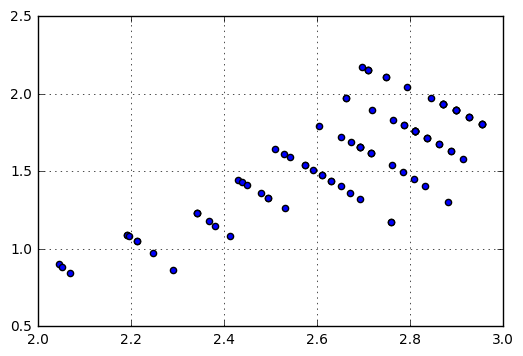

In [64]:
plt.scatter(x,y)
plt.xlim(2,3)
plt.ylim(0.5,2.5)
plt.grid(True)
plt.show()